Demographic Issues in PLAICRAFT AI - Equity as a Cornerstone to Building Better AI-powered NPCS
====

Ella Ilan, Emma Smith, James Kang, David Chang
---


![Minecraft Stock Photo](https://i.pinimg.com/736x/a0/e4/a7/a0e4a764011d37b209b35a87ab2431f1.jpg)

Introduction
===

In September of 2023, AI Researchers at UBC launched a “free Minecraft in the cloud” AI research data collection project. The project aims to collect 10,000 hours of freely volunteered play time. **Using this data, the lab hopes to create artificially intelligent non-player characters in Minecraft that act like real people. These NPCs would respond to both visual and auditory stimulus, and be able to play in various game modes just like real people** (Smith 2023).


 
Minecraft, a video game released in 2009, has taken the world by storm due to its limitless "sandbox game" design. There is no one right way to play. Minecraft can be played alone or in groups, with friends or online, passively or violently. Some gamemodes involve survival of the fittest, while others, such as "Creative" mode, use the game to build whatever the user wants (Landin 2023).

**Research has shown different demographics approach playing video games differently.** Due to literacy and generational conventions, different age-groups use in-game chat features differently (Ames and Burrell 2017); In studies examining gender differences, girls often played more collaboratively and patiently, while boys were drawn to objective-oriented gameplay modes (Yeh, Lan, and Lin 2018). 


**When specifically considering Minecraft's diverse gamemodes, it makes sense these demographic differences would be refected in users' choices and approaches to limitless options**. 

If PLAICRAFT AI aims to make *realistic* non-player characters, the demographic of its research should be equitable and diverse– and by extension, include all types and approaches to gameplay. We were provided with a dataset which contained seven observations about each of its 196 unique players. Using this, our investigation seeks to better understand the demographic of participants in the research project so far, and ultimately to highlight biases and deficits that might skew the behaviour of PLAICRAFT's AI-Powered NPCs.


More specifically, we'd like to know: 

> Can factors such as self-described experience, age, and subscription to a video game newsletter. successfully predict the gender of players in this data set?

If these factors are accurate predictors, there would be evidence to suggest that different gender demographics engage with Minecraft differently. If there's evidence of a difference in demographic behaviour, effort should be put towards targeting them equitably for a more realistic AI result. 



Exploring the Players Dataset
====

These are the libraries we use for our analysis. Some of them we use for data wrangling, while the others are used for visualization.

In [30]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(RColorBrewer)

First, we load the data from a raw file stored in our GitHub Repo. For the sake of our analysis we removed any identitfying information, such as hashed emails, or the names of participants. 

In [61]:
players_full <- read_csv("https://raw.githubusercontent.com/ellailan/PLAICRAFT-Data-Analysis/refs/heads/main/data/players.csv") |>
            select(-hashedEmail, -name) 


head(players_full)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17


Exploring the dataset in a glance
---
***We can now see that our dataset, Players, consists of five columns, with 196 unqiue observations.***<br>
<br>
  **Experience**: *a factor*, either Beginner, Amateur, Pro or Veteran <br>
  **Subscribe**: *a boolean*, either true or false: are users subscribed to <br>
  **played_hours**: *a double*, the number of hours a player contributed to the project through playtime<br>
  **gender**: *a string*, the self-identified gender of a player <br>
  **Age**: *an integer*, the age of a player <br>

We can now start to better understand the makeup of the dataset, through calculations and graphs. 



In [67]:
#looking at the most common responses and averages in the dataset, players

mean_hours <- players |> summarize(mean_played_hours = mean(played_hours, na.rm = TRUE))
mean_age <- players |> summarize(mean_age = mean(Age, na.rm = TRUE)) 

median_hours <- players |> summarize(median_played_hours = median(played_hours, na.rm = TRUE))
median_age <- players |> summarize(median_age = median(Age, na.rm = TRUE)) 

gender <- players |> select(gender) |> count(gender, sort = TRUE) 
most_pop_gender <- gender |> 
                    slice_head(n = 1) |> 
                    select(- n) 

experience <- players |> 
                select(experience) |> 
                count(experience, sort = TRUE) 

most_pop_experience <- experience |> 
                        slice_head(n = 1) |>
                        select(- n) 

players_summaries <- bind_cols(mean_age, median_age, mean_hours, median_hours, most_pop_gender, most_pop_experience)

players_summaries



mean_age,median_age,mean_played_hours,median_played_hours,gender,experience
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
20.57764,19,5.622981,0.1,Male,Amateur


Exploring our dataset in numbers
--
***Most popular experience level***: Amateur <br>
***Most popular gender***: Male <br>
***Mean age***: 20.5 <br>
***Median age***: 19 <br>
***Mean played hours***: 5.8
<br>
***Median played hours***: 0.1<br>
<br>


Exploring our dataset in graphs
---
We now want to visualize variables of interest, to better understand what the distributions look like and what they can tell us about the research project. Gender was a key variable we were curious to investigate. We can create a graph to show the distribution of genders in the dataset. 

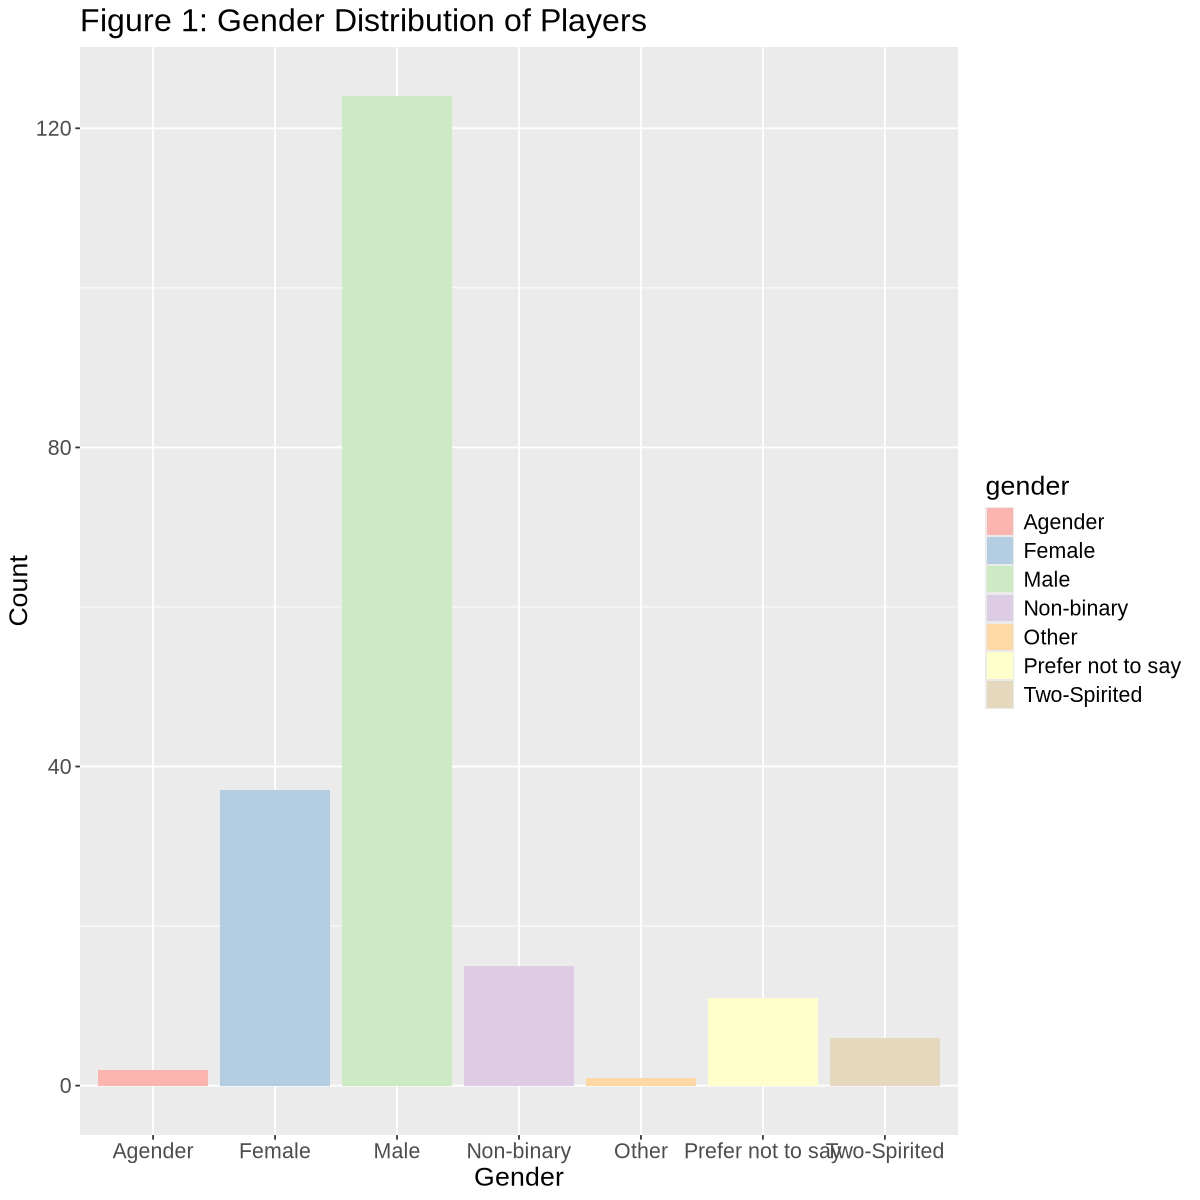

In [63]:
options(repr.plot.width = 10, repr.plot.height = 10) 

gender_full <- players_full |> ggplot(aes(x = gender, fill = gender)) +
  geom_bar() +
  labs(title = "Figure 1: Gender Distribution of Players", x = "Gender", y = "Count") +
    theme(text = element_text(size = 16))  +
    scale_fill_brewer(palette = 'Pastel1')

gender_full

For the sake of simplication in further calculations, our project will look at the majority gender categories of male and female. We can also look at other distributions, such as those of experience level, age, subscription status, and playtime. 

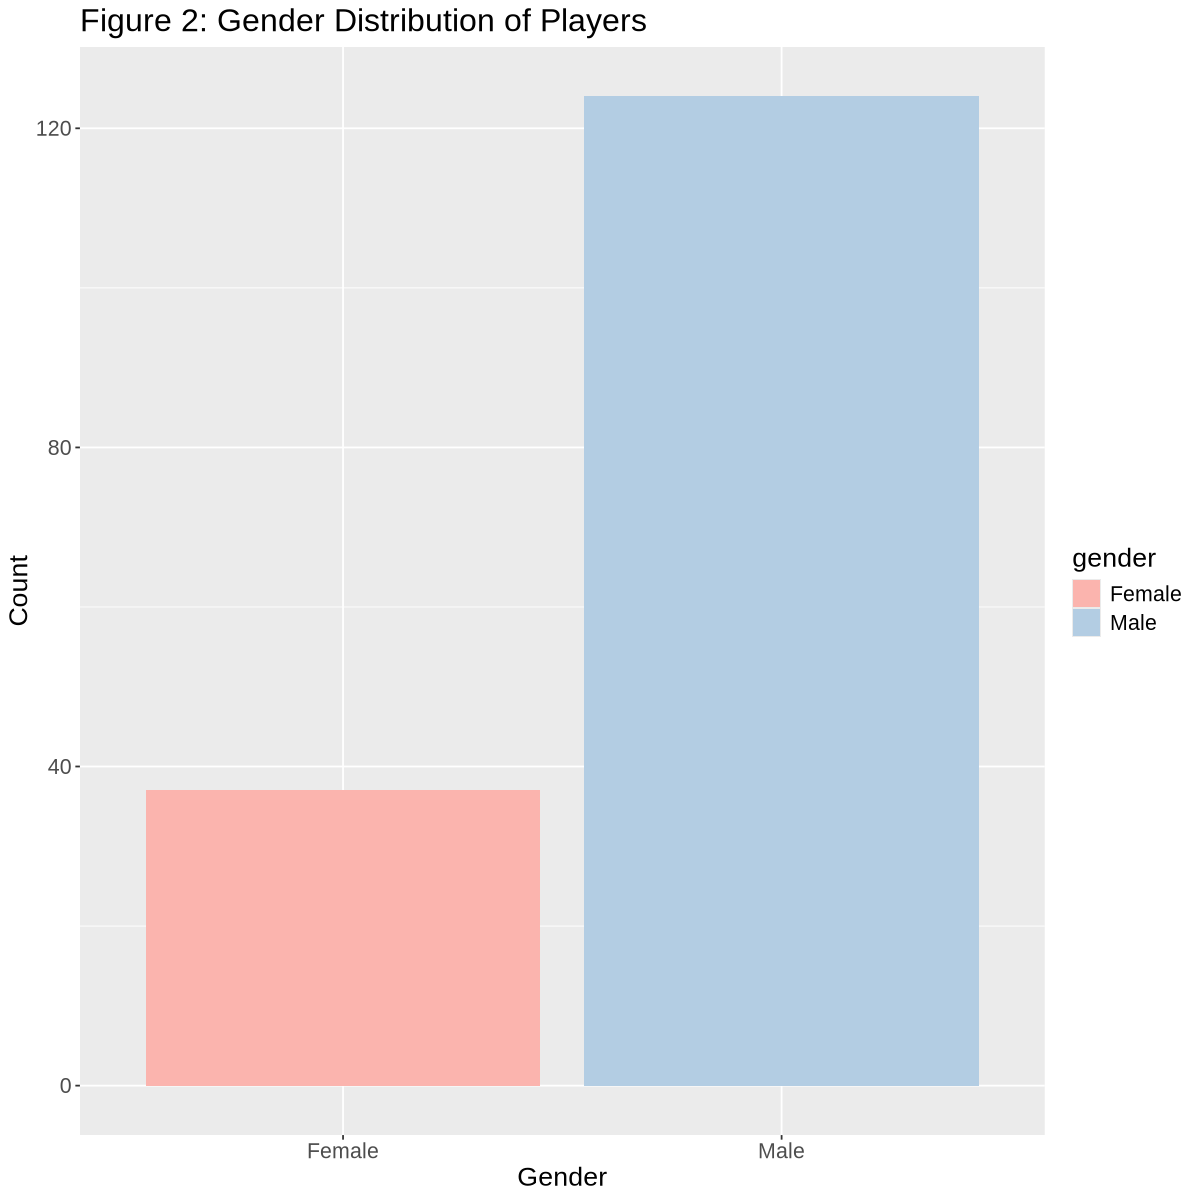

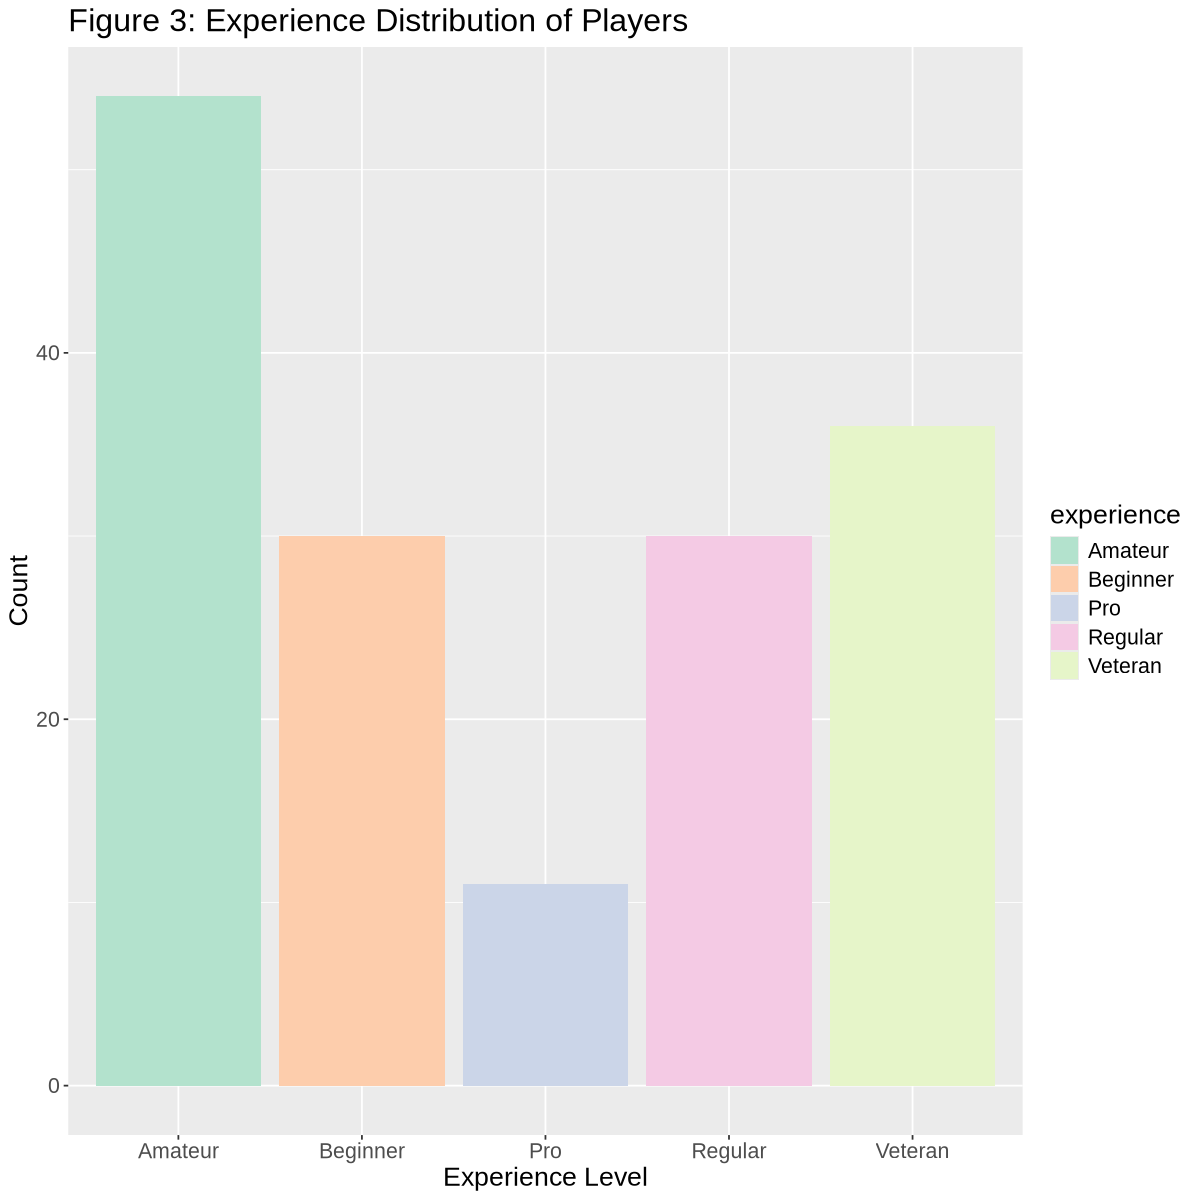

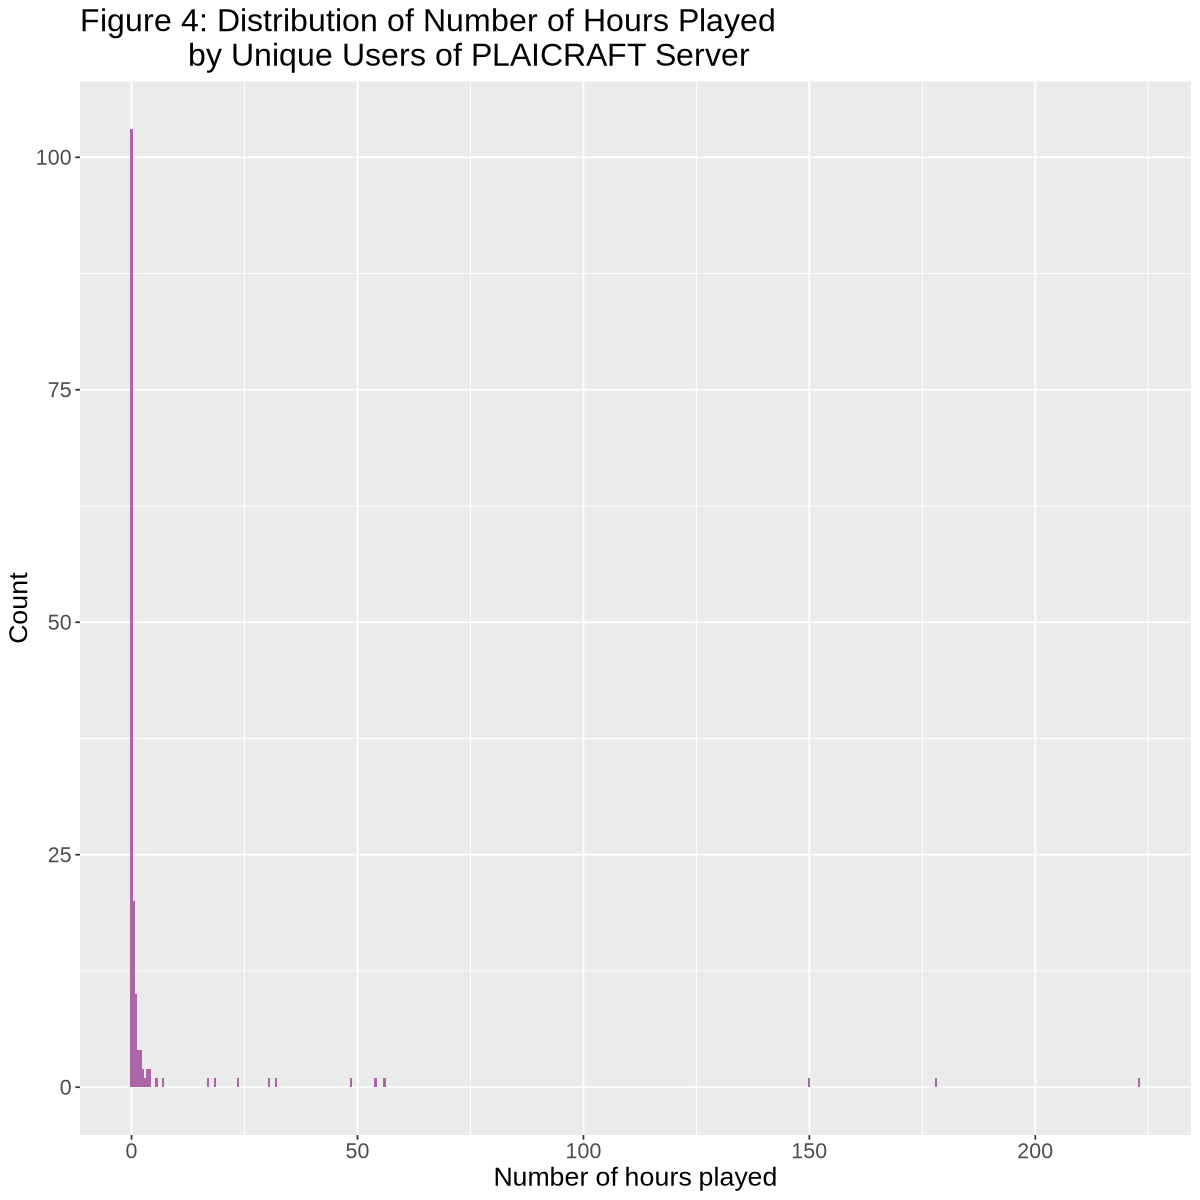

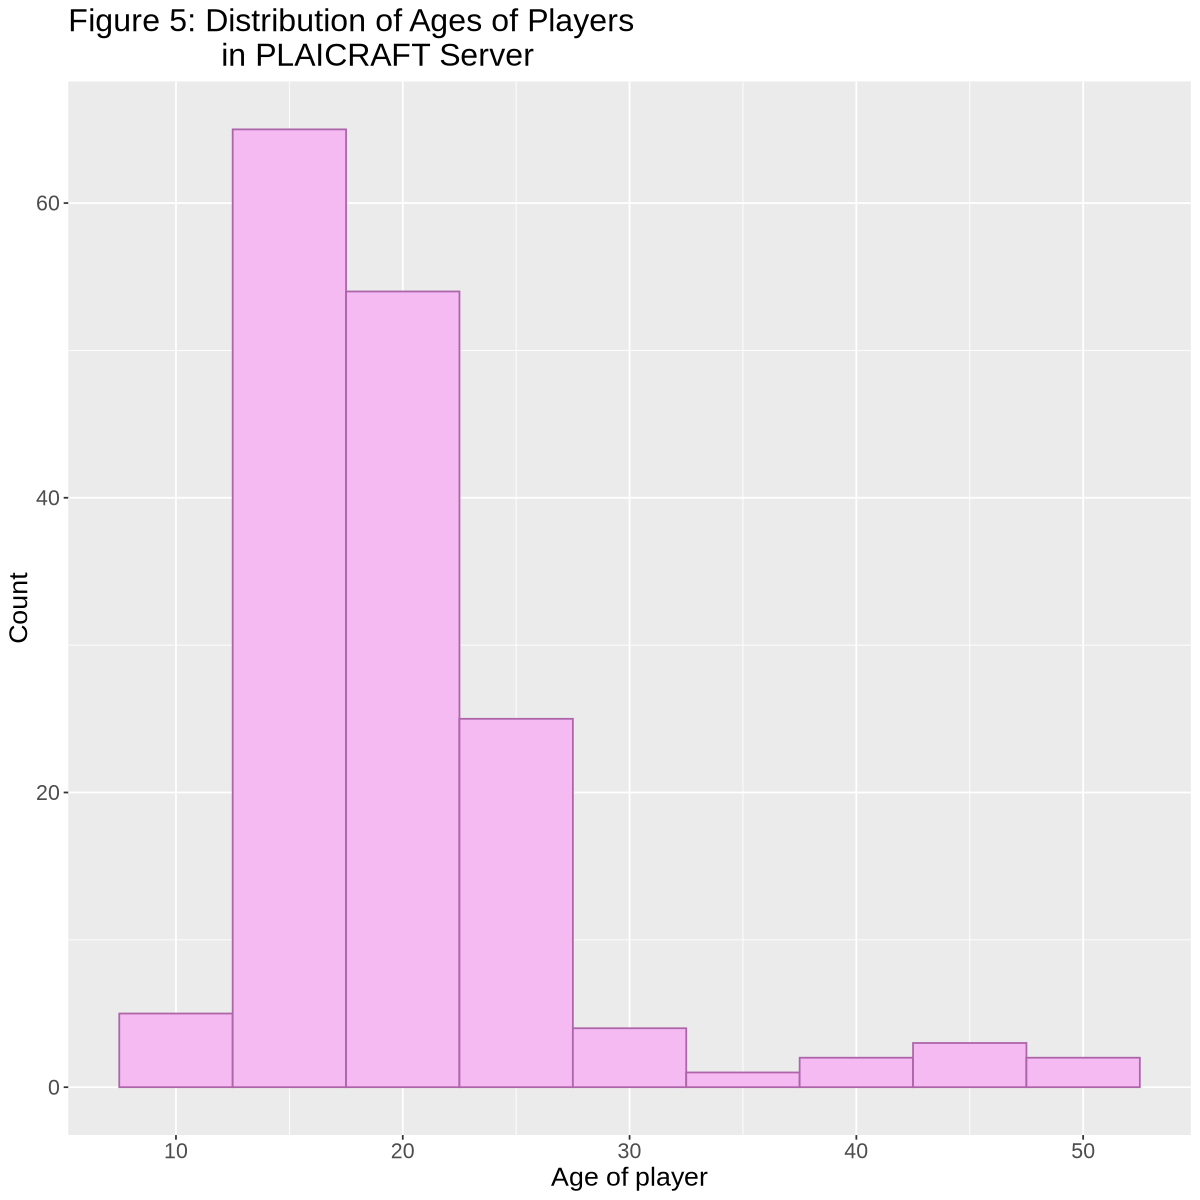

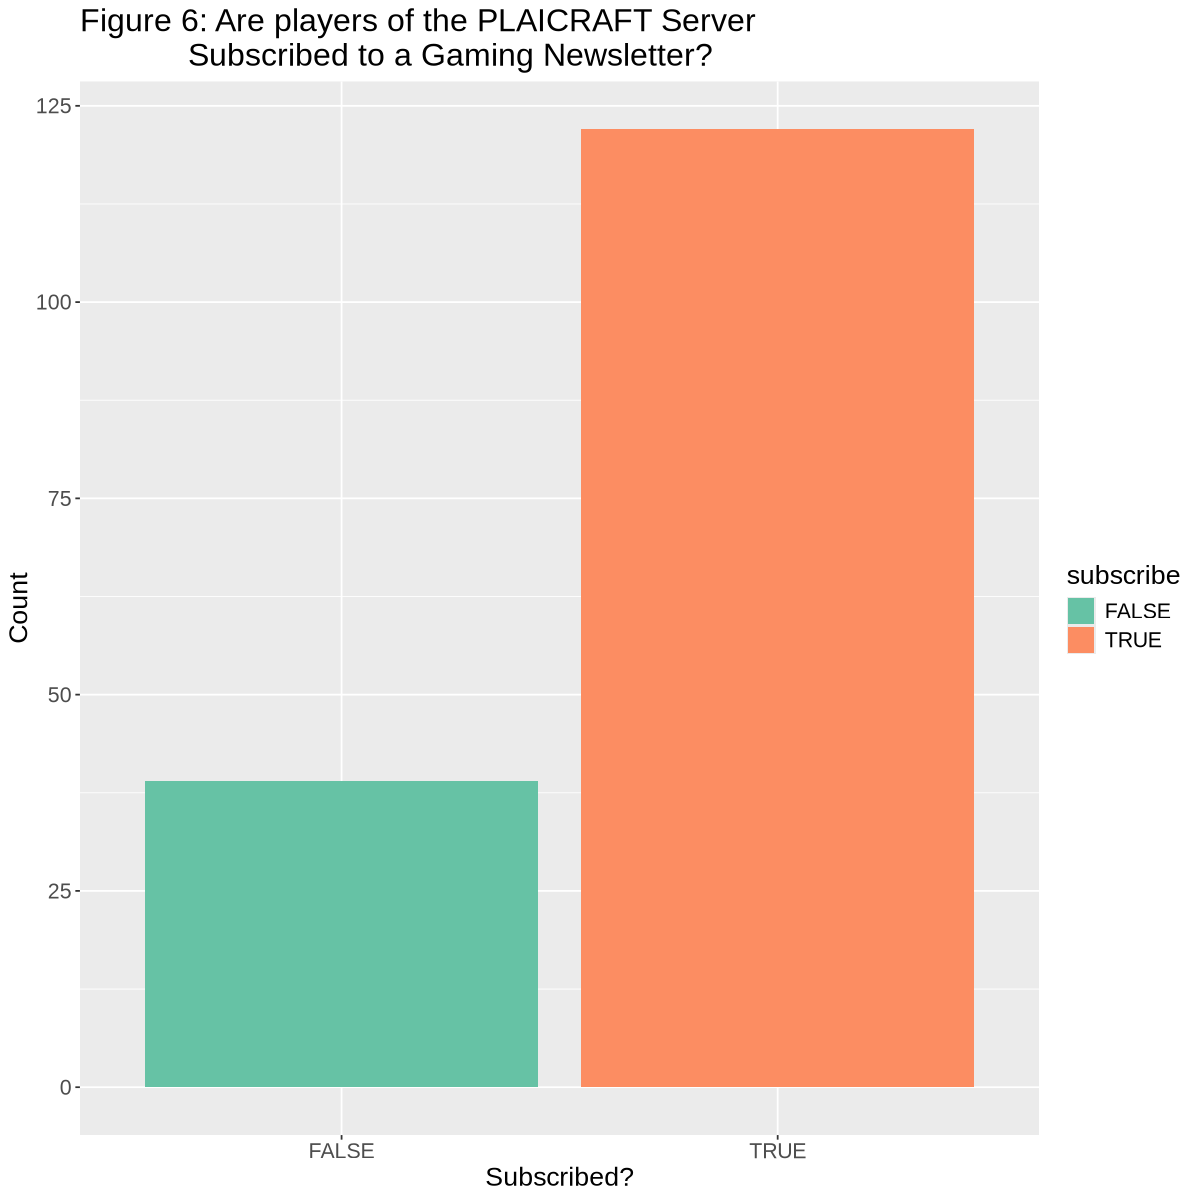

In [64]:

players <- players_full |> filter(gender == "Male" | gender == "Female") 


#visualizing some things that we can see abt. gender makeup of surveyed participants
gender <- players |> ggplot(aes(x = gender, fill = gender)) +
  geom_bar() +
  labs(title = "Figure 2: Gender Distribution of Players", x = "Gender", y = "Count") +
    theme(text = element_text(size = 16))  +
    scale_fill_brewer(palette = 'Pastel1')

gender

experience <- players |> ggplot(aes(x = experience, fill = experience)) +
  geom_bar() +
  labs(title = "Figure 3: Experience Distribution of Players", x = "Experience Level", y = "Count") +
    theme(text = element_text(size = 16))  +
    scale_fill_brewer(palette = 'Pastel2')

play_distribution <- players |> ggplot(aes(x = played_hours)) +
  geom_histogram(binwidth = 0.5, fill = "#ad65aa") +
    labs(x = "Number of hours played", y = "Count") +
    ggtitle("Figure 4: Distribution of Number of Hours Played
            by Unique Users of PLAICRAFT Server") +
    theme(text = element_text(size = 16))

age_distribution <- players |> ggplot(aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = "#f5baf2", color = "#ad65aa") +
    labs(x = "Age of player", y = "Count") +
         ggtitle("Figure 5: Distribution of Ages of Players 
                 in PLAICRAFT Server") +
    theme(text = element_text(size = 16))

subscribe <- players |> ggplot(aes(x = subscribe, fill = subscribe)) +
  geom_bar() +
  labs(title = "Subscription Status", x = "Subscribed?", y = "Count") +
    ggtitle("Figure 6: Are players of the PLAICRAFT Server 
            Subscribed to a Gaming Newsletter?") +
    theme(text = element_text(size = 16)) +
    scale_fill_brewer(palette = 'Set2')

experience
play_distribution
age_distribution
subscribe

Evaluating our graphs
----

Looking at these graphs we can learn a few things about the data collected in this dataset. In Figure 5 we can see age is a skewed distribution with a significant peak at 15-20, probably because a majority of participants were undergraduate college students. There are some outlying values in the adult range. Figures 2 and 6 reveal most players are subscribed to the newsletter and are male– almost 75% in each category. Figure 3 shows us most players identify as amateur but there is a fairly even spread of skill levels in our data set. <br>

Figure 4 reveals that **play time is a significantly skewed distribution, with most players only playing for a few minutes.** When considered in context, this means most players aren't engaging with PLAICRAFT fully– rather, they come on, get comfortable with the features, and then stop using the server.  **The mean is skewed by some extreme outliers, including a few players that "played" for hundreds of hours**. The implications of the lack of overall playtime from most players is significant. It might suggest that the data collection program is biased towards the behaviours of players while they orient themsleves to their surroundings at the beginning of the game, **rather than actual gameplay behaviour**. <br>


Visualizing relationships in the data
----
We can make a few more visualizations to explore potential relationships in our dataset. To look at age as a "category", we can mutate the data so that age is looked at in groups of 5.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Pastel2 is 8
Returning the palette you asked for with that many colors
”


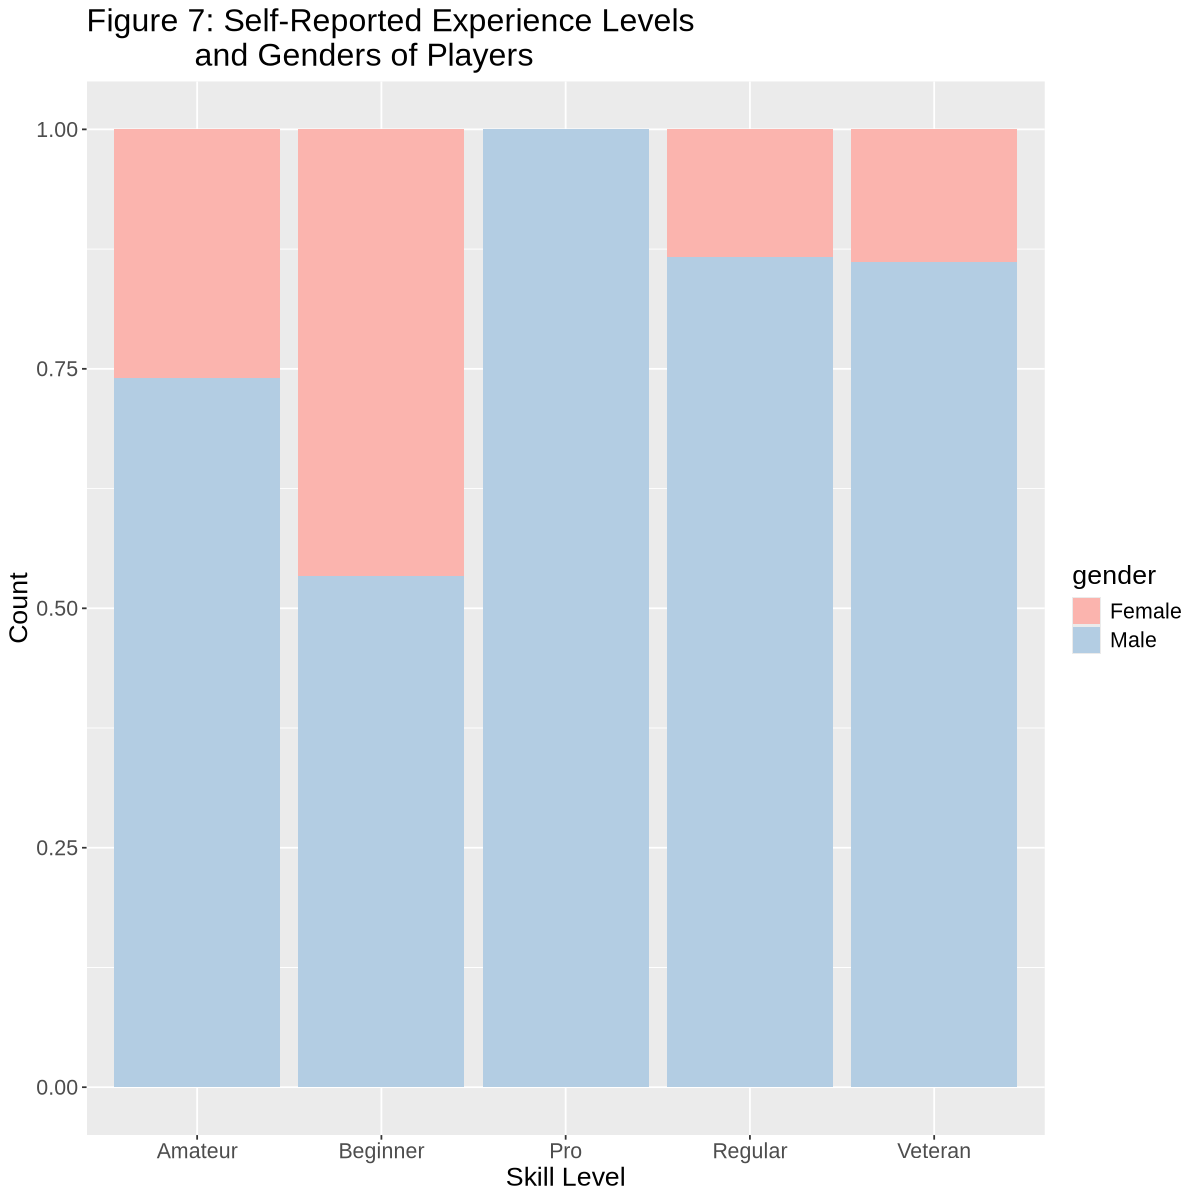

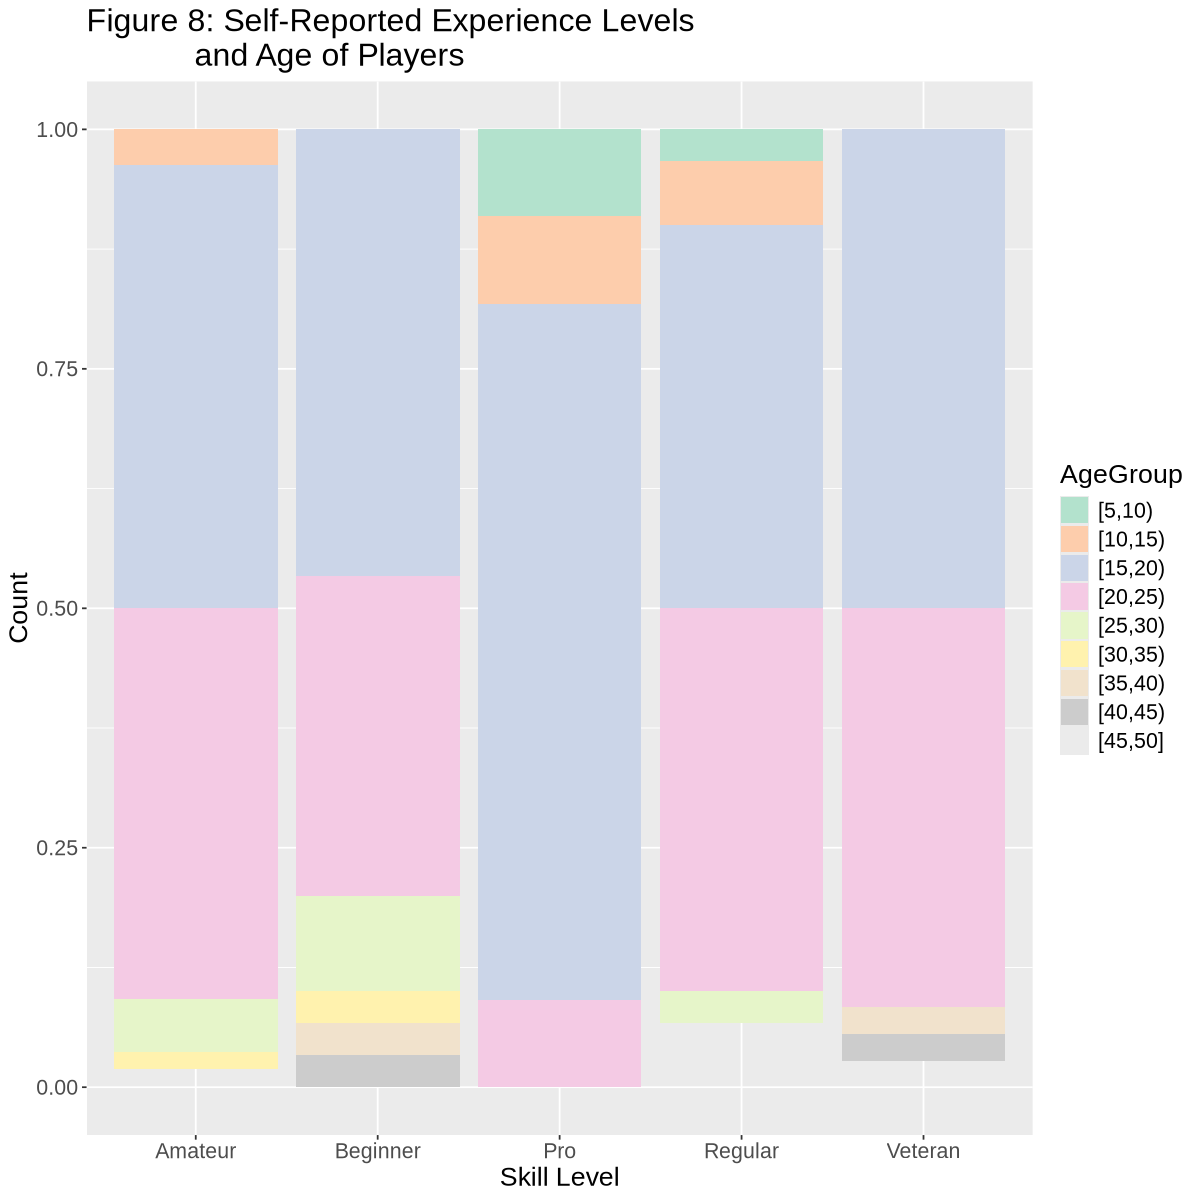

In [73]:
experience_gender <- players |> ggplot(aes(x = experience, fill = gender)) +
  geom_bar(position = "fill") +
  labs(color = "Gender", y = "Count", x = "Skill Level") + 
    ggtitle("Figure 7: Self-Reported Experience Levels
            and Genders of Players") +
    theme(text = element_text(size = 16)) +
    scale_fill_brewer(palette = 'Pastel1')


players <- players |> 
  mutate(AgeGroup = cut_width(Age, width = 5, boundary = 0, closed = "left"))

experience_age <- players |> ggplot(aes(x = experience, fill = AgeGroup)) +
  geom_bar(position = "fill") +
  labs(color = "Age Group", y = "Count", x = "Skill Level") + 
    ggtitle("Figure 8: Self-Reported Experience Levels
            and Age of Players") +
    theme(text = element_text(size = 16)) +
    scale_fill_brewer(palette = 'Pastel2')

experience_gender
experience_age

In Figure 7, when exploring gender and experience, men are more likely to identify as Veterans or Professionals. No women self-identified as Professionals, and few as Veterans, while beginner numbers were nearly equal. **This might reflect the higher male participation in the survey, but the gender gap across expertise levels is notable, as we would expect to see even proportions of expertise. This suggests there might be a relationship between gender and experience level.**


When looking at age and experience in Figure 8, we see a more spread out distribution across experience levels that closely resembles the overall distribution of age. 


Methods and Results - K-NN Analysis
===

Can factors such as self-described experience, age, and subscription to a video game newsletter successfully predict the gender of players in this data set?
---

To apply a KNN algorithim, we begin by mutating the gender column into a factor variable to categorize players gender. 

We then have to make sure our other values are all numeric. To do so, we decided to assign a numeric score to experience levels. Experience goes from being either "Beginner," "Amateur," "Pro," and "Veteran", to an integer from 1 to 4, where 1 represents the most beginner level and 4 indicates the most advanced experience. 


Similarly, we transform the subscribe column into a binary numeric scale, with 0 indicating non-subscription and 1 indicating subscription. After removing any missing values, our dataset is clean and ready to analyze! 

In [50]:


#experience is now scored from 1 to 4, with 1 being the most beginner and 4 being the most advanced
#subscription is now scored from 0 to 1, where 0 is not subscribed and 1 is subscribed
players <- players |>
            mutate(gender = as.factor(gender)) |>
            mutate(experience = as.numeric(factor(experience, 
                                              levels = c("Beginner", "Amateur", "Pro", "Veteran")))) |>
            mutate(subscribe = as.numeric(subscribe))

players <- drop_na(players)



Now, we set a random seed or reproducibility and use the initial_split function to divide the sample into training and testing datasets. We chose an 80% training and 20% testing split, per the reccomendation of a TA. The split was stratified by gender to ensure balanced representation in both sets. 

In [45]:
set.seed(1234) 

#splitting data into testing and training, using the proportion reccomended by TA as feedback to proposal 
gender_split <- initial_split(players, prop = 0.80, strata = gender)
gender_train <- training(gender_split)   
gender_test <- testing(gender_split)

We now split our dataset for cross validation using 5 folds and the vfold function, with stratification again by gender. Using 5 folds allows us to assess the model’s generalizability without excessive computation. 

We also create a tibble of possible k-values we want to analyze, ranging from 1-10, to evaluate in our tuning. Our end goal here is to use cross-validation to find the optimal number of neighbors for our model. 


In [54]:
set.seed(1234) 
vfold <- vfold_cv(gender_train, v = 5, strata = gender)
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

To perform our K-NN analysis, we create a recipe that states we want to find the gender of a datapoint using the experience level, subscription status, and age they provided. We provide it the training data, and then scale and center all metrics to avoid one variable having a larger or smaller influence on our algorithim than another.

We create a K-NN model that's prepared to tune its K-value rather than have one set in stone. We then add our recipe and this tuning model together in a workflow. Our K-NN model runs 10 times, for each of our K-Values, using 5-fold cross-validation, and returns a tibble of metrics collected in the process.

In [69]:

gender_recipe <- recipe(gender ~ experience + subscribe + Age, data = gender_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")


knn_results <- workflow() |>
      add_recipe(gender_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = vfold, grid = k_vals) |>
      collect_metrics() 


Using these metrics, we filter specifically for accuracy and store it in its own data frame, accuracies. Using the ggplot package we can visualize the relationship between the number of k-neighbors and the accuracy estimate of the algorithim.

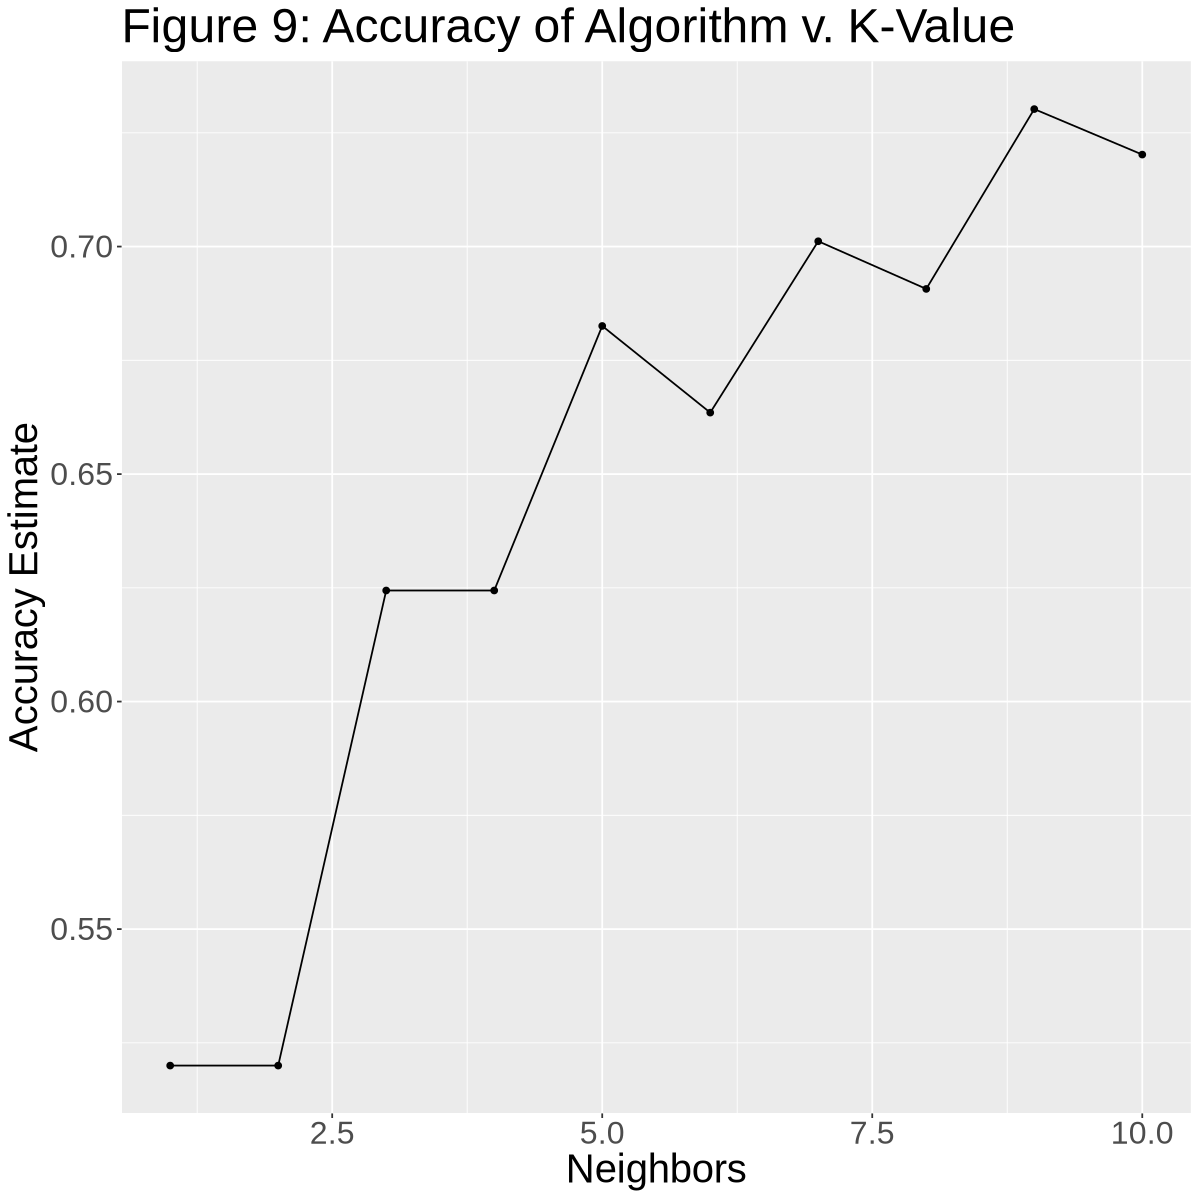

In [74]:

accuracies <- knn_results |> 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
        ggtitle("Figure 9: Accuracy of Algorithm v. K-Value") +
        theme(text = element_text(size = 24))


accuracy_versus_k

Figure 9 has a peak in accuracy at k = 9, which suggests that this is the optimal value for our k-NN model between 1 and 10. 

*(It's worth noting that while the scale of our model makes the increase in accuracy look quite steep, this could lead to a misunderstanding of the data. From k = 1 to k = 9, our model's accuracy only really increases 25%– a notable, but not monumental, amount. There is a fairly small range of values here.)*


Using the results of Figure 9 we proceed to set k = 9 for our final model's specification. We then fit the model to training data using the same recipe from before and our new model specification. 


Using this, we can  predict the gender outcomes on the test data. The predictions were combined with the the test dataset for comparison creating the gender_test_predictions data frame, which contains both predicted and actual gender values. 


In [78]:
gender_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
      set_engine("kknn") |>
      set_mode("classification")

gender_fit <- workflow() |>
      add_recipe(gender_recipe) |>
      add_model(gender_spec) |>
      fit(data = gender_train)

gender_test_predictions <- predict(gender_fit , gender_test) |>
      bind_cols(gender_test)


head(gender_test_predictions)

.pred_class,experience,subscribe,played_hours,gender,Age,AgeGroup
<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
Male,2,1,0.7,Female,21,"[20,25)"
Male,2,0,0.0,Male,21,"[20,25)"
Male,4,1,0.0,Female,22,"[20,25)"
Female,1,1,0.0,Male,17,"[15,20)"
Male,4,0,0.1,Male,18,"[15,20)"
Male,2,1,0.1,Male,23,"[20,25)"


We can now compare the predicted classification and the actual gender of each of our datapoints. 

In [44]:
gender_prediction_accuracy <- gender_test_predictions |>
        metrics(truth = gender, estimate = .pred_class) |>
        filter(.metric == "accuracy") 

gender_prediction_accuracy


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7407407


The accuracy of the model on the test data was calculated using the metrics function, comparing predicted and actual gender values. The resulting accuracy is 0.7407, **as in 74.07% of our models' predictions of gender are correct**. 

Discussion
===
Through this analysis of the PLAICRAFT player information sample, we explored the question: “Can factors such as self-described experience, age, and subscription to a gaming-related newsletter successfully predict the gender of players in this dataset?” 

To answer this, we developed a classifier that leverages player experience, age, and subscription status to accurately predict the gender of new players.


Results of the Algorithm
--
**Our classifier achieved an accuracy of 74% using a k-nn neighbors algorithm of k = 7.** Generally, this affirms our research question. By knowing other information about participants in the survey, we could relavtively accuraely guess their gender. This makes sense when we consider the visualizations and explorations of the data from earlier in this report. Notably, Self-reports of expertise, for example, do not seem to be independant of gender identity and would probably be useful to the algorithim in classifiying a player's gender identity correctly. 

Potential Issues
---

It is worth noting that the skewed distribution of genders is a **notable source of error in our algorithm**. When answers other than male or female were removed from the dataset, we ended up with a total count of 161 players– of which 124 were male– or 77%. Note how close this is to our accuracy percentage. This is why there is such a generally steep and positive slope to our graph of K v. Accuracy; An algorithm which includes more datapoints as nearest neighours would become more and more likely to predict every gender to be male. **It can be understood that our algorithim does something similar, predicting nearly every datapoint to be male, due to the extreme bias in the dataset.** Even if our algorithim always predicted male, it would still be successful 77% percent of the time. 

Beyond this bias, our dataset is also noticably very small. With less than 200 datapoints, our training sample was made up of only around 30 unqiue datapoints. Generally, the more data, the better the resutls of our K-NN algorithm could be. **With such a small and biased sample the reproducibility of our research remains unclear.**


Potential Solutions
--

**PLAICRAFT AI seems to be struggling with data collection from several perspectives.** Not only is data skewed in gender, but playtime rarely exceeds six minutes. With an endgoal of creating realistic non-player characters, the project needs to alter its data collection methods, to focus on both gender equality as well as collecting longer and more valuble play sessions. 

Our reccomendation is to target 100- and 200- level computer and data science courses, where the population of students is large and gender distributions are much more reflective of the general population. Instructors could offer one, synchronous  class worth of Minecraft playtime for extra credit. If everyone in the class plays together, useful and meaningful data about player behaviour can be observed over a sustained period of time, repersenting a breadth of people and backgrounds. Better data collection is the first step towards making PLAICRAFT AI a success.  

## References
------------

Ames, Morgan G, and Jenna Burrell. 2017. “‘Connected Learning’ and the Equity Agenda.” *Conference on Computer Supported Cooperative Work,* February. https://doi.org/10.1145/2998181.2998318.

Landin, Per. 2023. “What Is Minecraft.” Minecraft.net. Minecraft. June 5, 2023. https://www.minecraft.net/en-us/article/what-minecraft.

Smith, Andrew. 2023. “Plaicraft.ai Launch - Pacific Laboratory   for Artificial Intelligence.” Pacific Laboratory for Artificial Intelligence. September 28, 2023. https://plai.cs.ubc.ca/2023/09/27/plaicraft/.

Yeh, YiLien, YuJu Lan, and YenTing R Lin. 2018. “GenderRelated Differences in Collaborative Learning in a 3D Virtual Reality Environment by Elementary School Students.” *Journal of Educational Technology & Society* 21 (4): 204–16. https://doi.org/10.2307/26511549.